In [1]:
import torch 

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [9]:
%cd yolov5

[WinError 2] The system cannot find the file specified: 'yolov5'
E:\projects\Algae classification\code\yolov5


In [1]:
# !pip install -r requirements.txt

# Divide the dataset in train and val folder. 

In [10]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'E:\\projects\\Algae classification\\code\\data\\images\\train'
valPath = 'E:\\projects\\Algae classification\\code\\data\\images\\val'
crsPath = 'E:\\projects\\Algae classification\\code\\data_copy\\' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  2156
Validation images are :  539


In [11]:

trainimagePath = 'E:\\projects\\Algae classification\\code\\data\\images\\train'
trainlabelPath = 'E:\\projects\\Algae classification\\code\\data\\labels\\train'
valimagePath = 'E:\\projects\\Algae classification\\code\\data\\images\\val'
vallabelPath = 'E:\\projects\\Algae classification\\code\\data\\labels\\val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)






In [12]:

#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 


'E:\\projects\\Algae classification\\code\\data\\images\\val\\data_copy'

# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
### This file contains information required by YOLO to train the model on the custom data. 

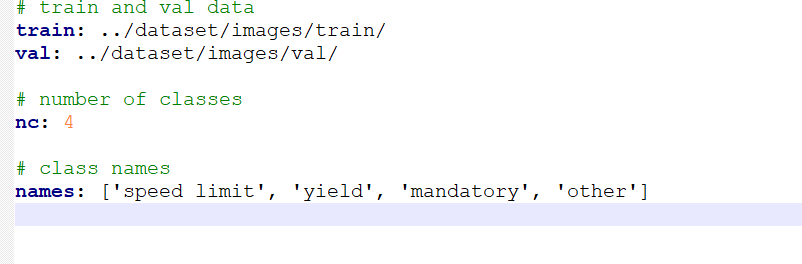

In [22]:
pwd

'E:\\projects\\Algae classification\\code\\yolov5'

In [26]:
!python train.py --img 415 --batch 8 --epochs 10 --data dataset.yaml --weights yolov5s.pt --cache

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=10, batch_size=8, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-1-12 torch 1.10.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoar


Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'



 22          [-1, 10]  1         0  models.common.Concat                    [1]                           
 23                -1  1   1182720  models.common.C3                        [512, 512, 1, False]          
 24      [17, 20, 23]  1     24273  models.yolo.Detect                      [4, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512]]
Model Summary: 270 layers, 7030417 parameters, 7030417 gradients, 15.9 GFLOPs

Transferred 343/349 items from yolov5s.pt
Scaled weight_decay = 0.0005
optimizer: SGD with parameter groups 57 weight, 60 weight (no decay), 60 bias

train: Scanning '..\dataset\labels\train.cache' images and labels... 2156 found, 0 missing, 0 empty, 2 corrupted: 100%|##########| 2156/2156 [00:00<?, ?it/s]
train: Scanning '..\dataset\labels\train.cache' images and labels... 2156 found, 0 missing, 0 empty, 2 corrupted: 100%|##########| 2156/2156 [00:00<?, ?it/s]
train: WARNING: ..\dataset\images\train\H_V0000 (4).jpg: 